In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import matplotlib.ticker as mticker

## About the dataset

The dataset contains 12 months of product sales data, with multiple rows and 6 columns that are listed below this statement:

Order ID = Id of the order. <br/>
Product = Name of the product. <br/>
Quantity Ordered = The quantity of each product in a order. <br/>
Price Each = Individual price of the product. <br/>
Order Date = The date of the order. <br/>
Purchase Address = The address of the buyer. <br/>

### Task #1: Merge the 12 months of sales data into a single CSV file

In [2]:
files = [file for file in os.listdir('./Sales_Data/')]
# getting all the csv files in the current directory.

all_months_data = pd.DataFrame()

# concatenating all the csv into single file and appending to the created dataframe.
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

# transforming the dataframe to a csv file.
all_months_data.to_csv("all_data.csv", index=False)

#### Read in the updated csv file

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the data!

##### Drop rows of Nan

In [4]:
# Finding entire rows with Nan values.
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# Droping the rows.
all_data = all_data.dropna(how='all')
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


Find 'Or' and delete it

In [5]:
# fixing a 'Or' error.
# some rows were being duplicated in the dataframe causing the issue.
# a solution to that problem is to get all the rows that don't have the 'Or' value
# and update the dataframe with them.
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Convert columns to the correct type

In [6]:
all_data = all_data.copy()
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Converting to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Converting to float

### Augment the data with additional columns

#### Task #2: Add Month Column

In [7]:
# Adding a new column named 'Month' and converting it to integer.
all_data = all_data.copy()
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### Task #3: Add a sales column

In [8]:
# Adding a new column named 'Sales'.
all_data = all_data.copy()
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task #4: Add a city column

In [9]:
# Splitting the purchase address by the commas. Getting the index [1] to get the city.
def get_city(address):
    return address.split(',')[1]

# Splitting the purchase address by the commas and splitting the white space to get the state.
# We need the state because some cities have duplicates, example: Portland, OREGON  and Portland, MAINE
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data = all_data.copy()

# Applying the functions above to extract the city and the state of the 'Purchase Address' column
# and placing in a new column named 'City'.
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


### Question 1: What was the best month for sales? How much was earned that month?

In [10]:
# Adding up all the sales in each month.
results = all_data.groupby('Month').sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


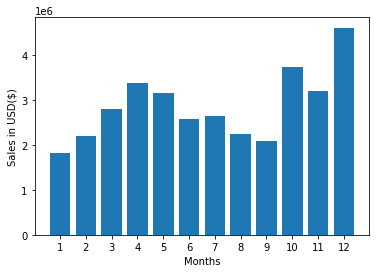

In [11]:
# obtaining all the months
months = range(1, 13)

# plotting a bar graph showing the sales amount for each month.
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Months')
plt.show()


# The best month for sales is December.

### Question 2: What city had the highest number of sales?

In [12]:
# performing a sum operation the get the number of sales on each city.
results = all_data.groupby('City').sum()
results.head()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80


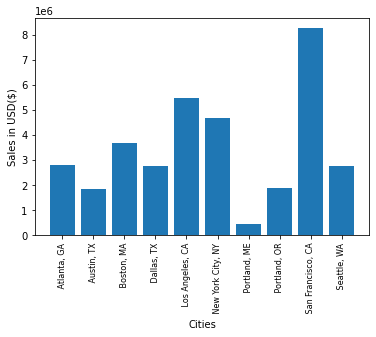

In [13]:
cities = [city for city,  df in all_data.groupby('City')]
# list comprehension to obtain the cities.

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
# using rotation to be able to see clearly the name of the cities. 

# rotation serve para rotacionar o eixo que as palavras estao escritas.
# size altera o tamanho da fonte.

plt.ylabel('Sales in USD($)')
plt.xlabel('Cities')
plt.show()


# San Francisco, CA had the highest number of sales.

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
# formatting all the data in the 'Order Date' column to datetime object.
all_data = all_data.copy()
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [15]:
# Adding two new columns, 'Hour' and 'Minute' using some funcionalities of the datetime library.
all_data = all_data.copy()
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

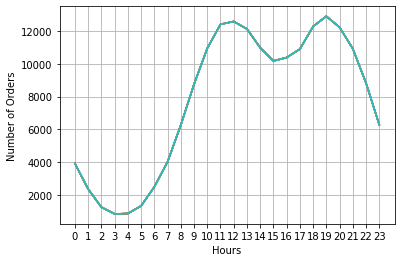

In [16]:
# getting all the hours with list comprehension.
hours = [hour for hour,  df in all_data.groupby('Hour')]

# counting the number of orders in each hour.
plt.plot(hours, all_data.groupby(['Hour']).count())
# 1 by 1 division of the plot.
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# The 11 AM (11) and 7 PM (19) have the highest number of orders.

### Question 4: What products are most often sold together?

In [17]:
# to resolve this question, finding the duplicated rows is essencial.
# all the rows that have the same 'Order ID' are duplicates.
df = all_data[all_data.duplicated(subset=['Order ID'], keep=False)]

df = df.copy()
# Extracting the products with the same order ID from the duplicated rows
# and then putting them together in a new column named 'Grouped'.
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Having stored the information required, we can drop the 
# duplicated rows.
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(20)

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [18]:
count = Counter()

# Iterating over the 'Grouped' column and splitting the products by a coma.
# Using the counter and combinations functions to store
# the numbers of orders that includes both products.
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# for loop to format the output.
for key, value in count.most_common(8):
    print(f"Products: {key} Orders: {value}")

Products: ('iPhone', ' Lightning Charging Cable') Orders: 1005
Products: ('Google Phone', ' USB-C Charging Cable') Orders: 987
Products: ('iPhone', ' Wired Headphones') Orders: 447
Products: ('Google Phone', ' Wired Headphones') Orders: 414
Products: ('Vareebadd Phone', ' USB-C Charging Cable') Orders: 361
Products: ('iPhone', ' Apple Airpods Headphones') Orders: 360
Products: ('Google Phone', ' Bose SoundSport Headphones') Orders: 220
Products: ('Vareebadd Phone', ' Wired Headphones') Orders: 143


### Question 5: What product sold the most? Why do you think it sold the most?

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


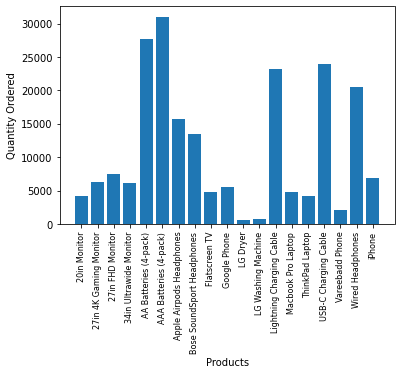

In [20]:
# retriving all the products and their respective quantity ordered.
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

# picking products 1 by 1.
products = [product for product,  df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()


# AAA batteries are the best selling product.

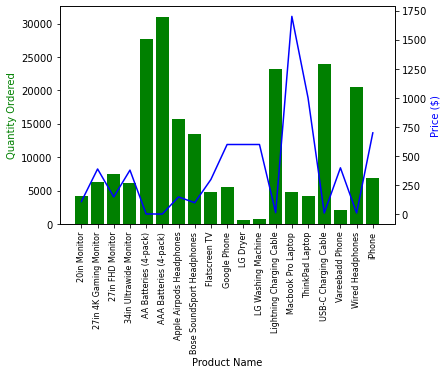

In [21]:
# getting all the products and doing the mean of their price.
prices = all_data.groupby('Product').mean()['Price Each']

# the way to place a second y axis
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# fixing the xticks.
ticks_loc = ax1.get_xticks()
ax1.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()